In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def u(x, y, a_1, b_1):
    numerator = a_1 * y
    denominator = 1/(1 + b_1 * x)
    fraction = numerator * denominator
    return x * (2 - x - fraction)


def v(x_new, y, z, a_1, a_2, b_1, b_2, d_1):
    numerator_x = a_1 * x_new
    denominator_x = 1/(1 + b_1 * x_new)
    fraction_x = numerator_x * denominator_x
    ###################################################
    numerator_y = a_2 * z
    denominator_y = 1/(1 + b_2 * y)
    fraction_y = numerator_y * denominator_y
    return y * (np.exp(-d_1) + fraction_x - fraction_y)


def w(y_new, z, a_2, b_2, d_2):
    numerator = a_2 * y_new
    denominator = 1/(1 + b_2 * y_new)
    fraction = numerator * denominator
    return z * (np.exp(-d_2) + fraction)

In [3]:
def _calculate_next_step(array, a_1, a_2, b_1, b_2, d_1, d_2):
    """This function receives an array containing the number of individuals for the species x, y and z, respectively,
    at a time t. The functions returns the new values of  x, y and z at a time t+1.

    Args:
        array (Array): List containing the number os individuals x, y, z, i.e. [x(t), y(t), z(t)];
        a_1 (Float): The value of the a_1 param;
        a_2 (Float): The value of the a_2 param;
        b_1 (Float): The value of the a_1 param;
        b_2 (Float): The value of the b_2 param;
        d_1 (Float): The value of the d_1 param;
        d_2 (Float): The value of the d_2 param;
    Returns:
        Array of the new values of x, y and z in this order, i.e, [x(t+1), y(t+1), z(t+1)]
    """
    x = array[0]
    y = array[1]
    z = array[2]
    x_new = u(x, y, a_1, b_1)
    y_new = v(x_new, y, z, a_1, a_2, b_1, b_2, d_1)
    z_new = w(y_new, z, a_2, b_2, d_2)
    return np.array([x_new, y_new, z_new], dtype=float)


def integrate_system(initial_conditions, number_steps, params):
    """The function solve the HPM sytem with a time step of 1 and returns the solution at each time t.

    Args:
        initial_condition (array-like): The initial conditions for x, y and z in this order,  i.e. [x(0),y(0),z(0)]
        number_steps (int): The number of iterations.
        params (array-like): An array containing the parameters of the system in te order [a_1, a_2, b_1, b_2, d_1, d_2]
    Returns:
        Returns an array of arrays with the x, y and z values at each time t with 0 < t < number_steps.
    """
    a_1, a_2, b_1, b_2, d_1, d_2 = params
    x_species = []
    y_species = []
    z_species = []
    all_species = initial_conditions
    for k in range(number_steps):
        x_species.append(all_species[0])
        y_species.append(all_species[1])
        z_species.append(all_species[2])
        all_species = _calculate_next_step(all_species, a_1, a_2, b_1, b_2, d_1, d_2)
    return np.array([x_species, y_species, z_species])

In [5]:
seed_1_site = 27900525585288891977993409593610930496  # Set a seed for the generator
generator_1_site = np.random.default_rng(seed=seed_1_site)
initial_cond_1_site = np.array([0.820, 0.124, 10.056])
noise_1_site = generator_1_site.uniform(
    -0.05 * initial_cond_1_site, 0.05 * initial_cond_1_site
)
params_1_site = (5, 0.1, 3.2, 2, 0.4, 0.01)
number_steps_1_site = 6500
time = np.arange(0, number_steps_1_site, 1)
x, y, z = integrate_system(
    initial_cond_1_site + noise_1_site, number_steps_1_site, params_1_site
)

# Plot dos Resultados

Text(0, 0.5, '$x(t)$')

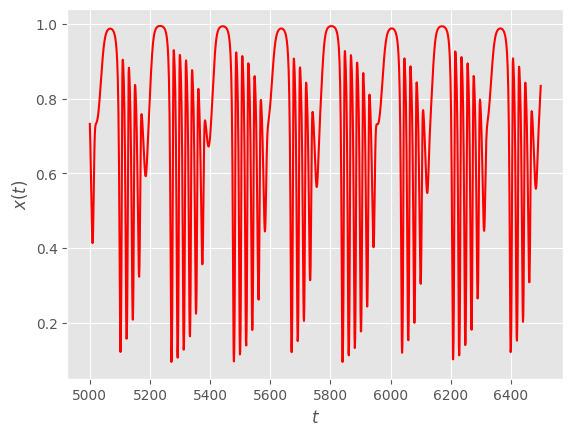

In [6]:
plt.style.use("ggplot")
_ = plt.plot(time[5000:], x[5000:], color="red")
plt.xlabel("$t$")
plt.ylabel("$x(t)$")

Text(0, 0.5, '$y(t)$')

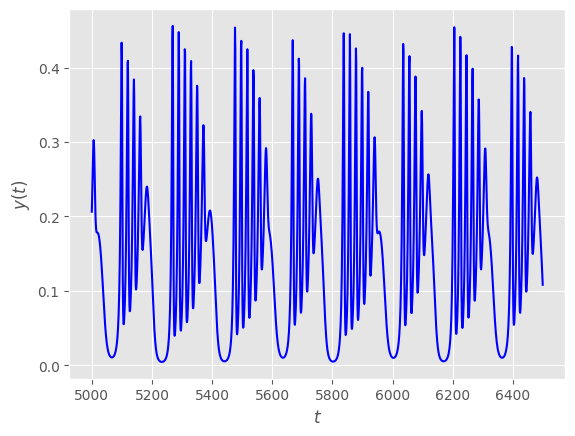

In [7]:
_ = plt.plot(time[5000:], y[5000:], color="blue")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")

Text(0.5, 0, '$t$')

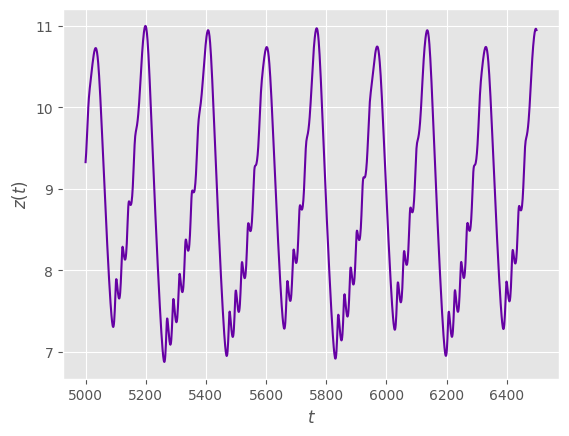

In [8]:
_ = plt.plot(time[5000:], z[5000:], color="#6601A4")
plt.ylabel("$z(t)$")
plt.xlabel("$t$")

In [13]:
%matplotlib inline

Text(0.5, 0, '$z$')

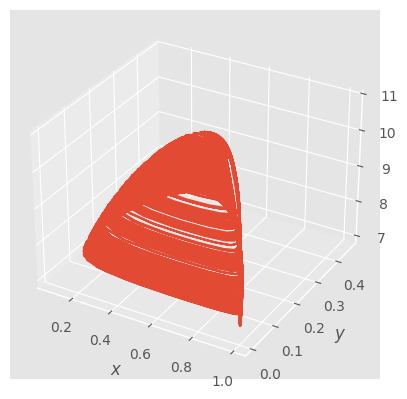

In [15]:
#%matplotlib widget
# careful with the magic command above, i dont know how to stop matplotlib from plotting other graphs on this 3d graph
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
_ = ax.plot(x, y, z)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")